In [1]:
# Importing libraries

# For numerical computation on nd-arrays
import numpy as np

# For data analysis and manipulations with dataset
import pandas as pd

# Data visualization library
import matplotlib.pyplot as plt

# Data visualization library built upon matplotlib
import seaborn as sns
 
# To ignore warnings related to versions mismatch or updates
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Using this, the output of plotting commands is displayed inline within this notebook
%matplotlib inline

# This class contains methods to perform analysis and find insights
# Some generalizations has been done according to all Datasets
class Analysis:
    
    # These class variables have been assigned as per the general behaviour of each dataset
    # Can easily be updated for an individual dataset
    
    # "Price" is the target variable for all the datasets, one which has to be predicted
    target = "Price"
    
    # This is a list of attributes which are not categorical to further help in analyzing categ features
    not_categorical = ["Area", "Price", "Location"]
    
    # These attributes has strongest correlation with target variable in almost all datasets
    strong_corr = ["Area", "No. of Bedrooms"]
    
    # On these numeric attributes, outlier removal must be done to gain better insights
    remove_outliers = ["Area", "Price"]
    
    def __init__(self, name):
        self.df = pd.read_csv(name)
        self.df_num = self.df.select_dtypes(include = ['float64', 'int64'])
        print(f"Shape - {self.df.shape}")
        
        # Remove duplicate rows
        print("Removed duplicate rows")
        self.df.drop_duplicates(inplace=True)
        print(f"Shape after removing duplicate rows - {self.df.shape}")
        
        #Check for missing values
        for index, value in self.df.isnull().sum().iteritems():
            if value > 0:
                print(f"There are {value} missing values in column - {index}")
        else:
            print("No missing values in dataset!")
    
    def PlotTargetVar(self):
        print("Distribution of target variable\n")
        print("Skewness: %f" % self.df[Analysis.target].skew())
        plt.figure(figsize=(10, 10))
        sns.distplot(self.df[Analysis.target], bins=100, color='r')
        
    def PlotFeatures(self):
        print("Distribution of data on each series in the df, resulting in one histogram per column\n")
        self.df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
    
    def CorrTarget(self):
        print("Correlation of every attribute with {}".format(Analysis.target))
        price_corr = self.df_num.corr()[Analysis.target][1:]
        print(price_corr.sort_values(ascending=False))
        #Adding strongly correlated values for plotting regplots
        for attr, corr in price_corr[abs(price_corr) > 0.3].sort_values(ascending=False).iteritems():
            if attr not in Analysis.strong_corr:
                Analysis.strong_corr.append(attr)
    
    def CorrFeatures(self):
        print("Analyzing feature to feature relationships\n")
        plt.figure(figsize=(24, 20))
        sns.heatmap(self.df_num.corr(), annot=True, annot_kws={"size": 8});
        
    def CategoricalFeatures(self):
        print("Lets look at categorical features distribution\n")
        df_cat = self.df.drop(columns=Analysis.not_categorical)
        for col in list(df_cat) :
            print(df_cat[col].value_counts())
            print('-' * 100)
        fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(6, 15))
        for i, ax in enumerate(fig.axes):
            if i < len(df_cat.columns):
                sns.countplot(x=df_cat.columns[i], data=df_cat, ax=ax);
        fig.tight_layout()
    
    def TargetAnalysisLoc(self):
        print("Top 5 locations with highest house prices and lowest house prices\n")
        ltop = self.df.groupby("Location")[Analysis.target].sum().sort_values(ascending=False)[:5]
        lbot = self.df.groupby("Location")[Analysis.target].sum().sort_values(ascending=True)[:5]
        loc = ltop.append(lbot)
        loc.plot.bar(figsize=(30,15))
        plt.tick_params(axis='both', labelsize=18)
        plt.xticks(rotation=45)
    
    def StrongCorrRegplot(self):
        print("Plotting data and linear regression model fit for strongly correlated values with", Analysis.target)
        rows = round(len(list(Analysis.strong_corr)) / 3)
        cols = 3
        fig, ax = plt.subplots(rows, cols, figsize=(cols*4,rows*3))
        for i, ax in enumerate(fig.axes):
            if i < len(Analysis.strong_corr):
                sns.regplot(x=Analysis.strong_corr[i], y='Price', data=self.df, ax=ax,
                                       scatter_kws={'s':6, 'alpha':0.8, 'color':'gray'},
                                line_kws={'lw':2, 'color':'black', 'linestyle':'dashed'})
    
    def OutlierAnalysis(self, columns=[]):
        Analysis.remove_outliers.extend(columns)
        
        # We'll perform outlier analysis on Price and Area using IQR score
        for col in Analysis.remove_outliers:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            self.df = self.df[~((self.df[col] < Q1 - 1.5 * IQR) | (self.df[col] > Q3 + 1.5 * IQR))]
        print("Removed outliers from ", end = '')
        for col in Analysis.remove_outliers:
            print(col, end = ' ')
        print(f"\nShape after removing outliers - {self.df.shape}")
            
    def CategorialToTarget(self):
        print(f"Relation to {Analysis.target} for all categorical features")
        df_cat = self.df.drop(columns=Analysis.not_categorical)
        rows = round(len(list(df_cat)) / 3)
        cols = 3
        fig, ax = plt.subplots(rows, cols, figsize=(cols*4,rows*3))
        for i, ax in enumerate(fig.axes):
            if i < len(df_cat.columns):
                sns.boxplot(x=list(df_cat)[i], y=Analysis.target, data=self.df, ax = ax)
        fig.tight_layout()

In [2]:
City = Analysis("Datasets/Chennai.csv")

# Top 5 rows
City.df.head()

Shape - (5014, 40)
Removed duplicate rows
Shape after removing duplicate rows - (4307, 40)
No missing values in dataset!


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [3]:
# Information about dataframe and datatype of each attribute  
City.df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4307 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4307 non-null   int64 
 1   Area                 4307 non-null   int64 
 2   Location             4307 non-null   object
 3   No. of Bedrooms      4307 non-null   int64 
 4   Resale               4307 non-null   int64 
 5   MaintenanceStaff     4307 non-null   int64 
 6   Gymnasium            4307 non-null   int64 
 7   SwimmingPool         4307 non-null   int64 
 8   LandscapedGardens    4307 non-null   int64 
 9   JoggingTrack         4307 non-null   int64 
 10  RainWaterHarvesting  4307 non-null   int64 
 11  IndoorGames          4307 non-null   int64 
 12  ShoppingMall         4307 non-null   int64 
 13  Intercom             4307 non-null   int64 
 14  SportsFacility       4307 non-null   int64 
 15  ATM                  4307 non-null   int64 
 16  ClubHo

In [4]:
'''
It gives us all the statistical measures:-
    -> Gives us mean, standard deviation
    -> 5-number summary
        -> min is the minimum element
        -> 25% is Q1 i.e. first quartile
        -> 50% is Q2 i.e. median
        -> 75% is Q3 i.e. third quartile
        -> max is maximum element
'''
City.df[["Price", "Area"]].describe()

,Price,Area
count,4.307000e+03,4307.000000
mean,8.933745e+06,1250.319248
std,1.067091e+07,657.161188
min,2.000000e+06,362.000000
25%,4.185500e+06,872.000000
50%,5.850000e+06,1092.000000
75%,8.922000e+06,1449.000000
max,1.900000e+08,7240.000000


Distribution of target variable

Skewness: 5.927452


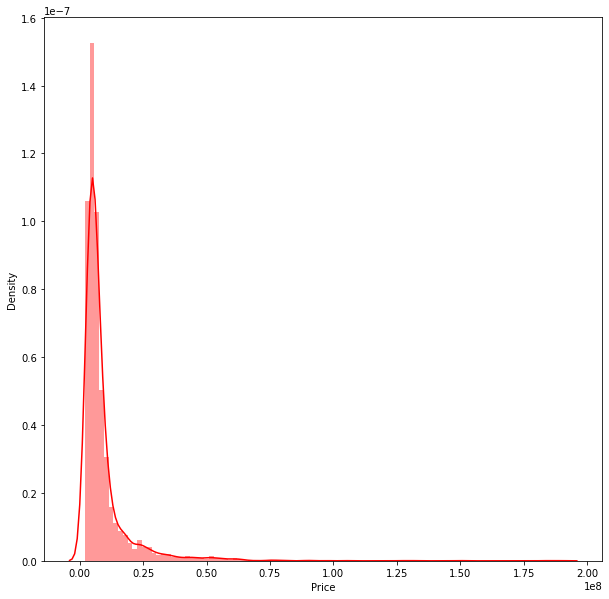

In [5]:
# Plots the distribution of target variable
# You can change the target variable using City.target = target_var, by default it's Price
City.PlotTargetVar()

In [6]:
# We can see prices are skewed right and value of skewness is large too!
# Skewness is basically the measure of how unsymmetric your data is!
# So to gain better insights, let's remove outliers from attributes- price and area
# You can also add parameter as a list of attributes for which outlier analysis has to be done
# By default, Price and Area as already been added to the list
City.OutlierAnalysis()

Removed outliers from Area Price 
Shape after removing outliers - (3643, 40)


Distribution of target variable

Skewness: 0.974015


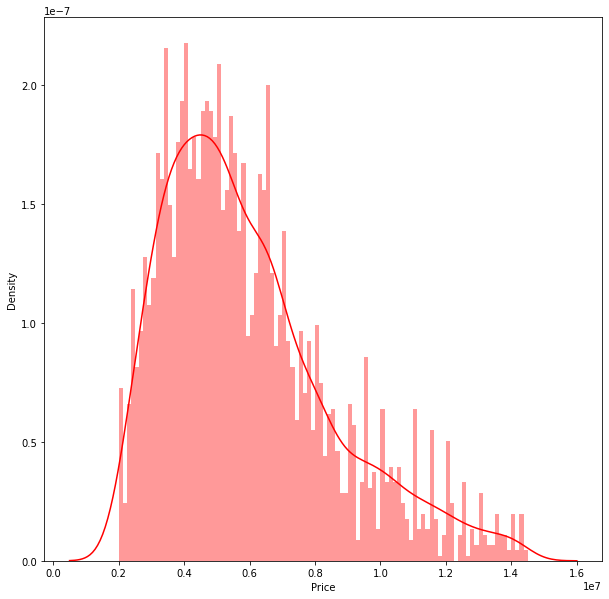

In [7]:
# Now we see a huge drop in number of rows/data-points, thus outliers are removed
# Now if we plot the distribution of target variable
City.PlotTargetVar()

In [8]:
# We can see that distribution is not too close to normal but better than before. Also, reduced skewness!
# We can also perform log on price column to reduce skewness

Distribution of data on each series in the df, resulting in one histogram per column



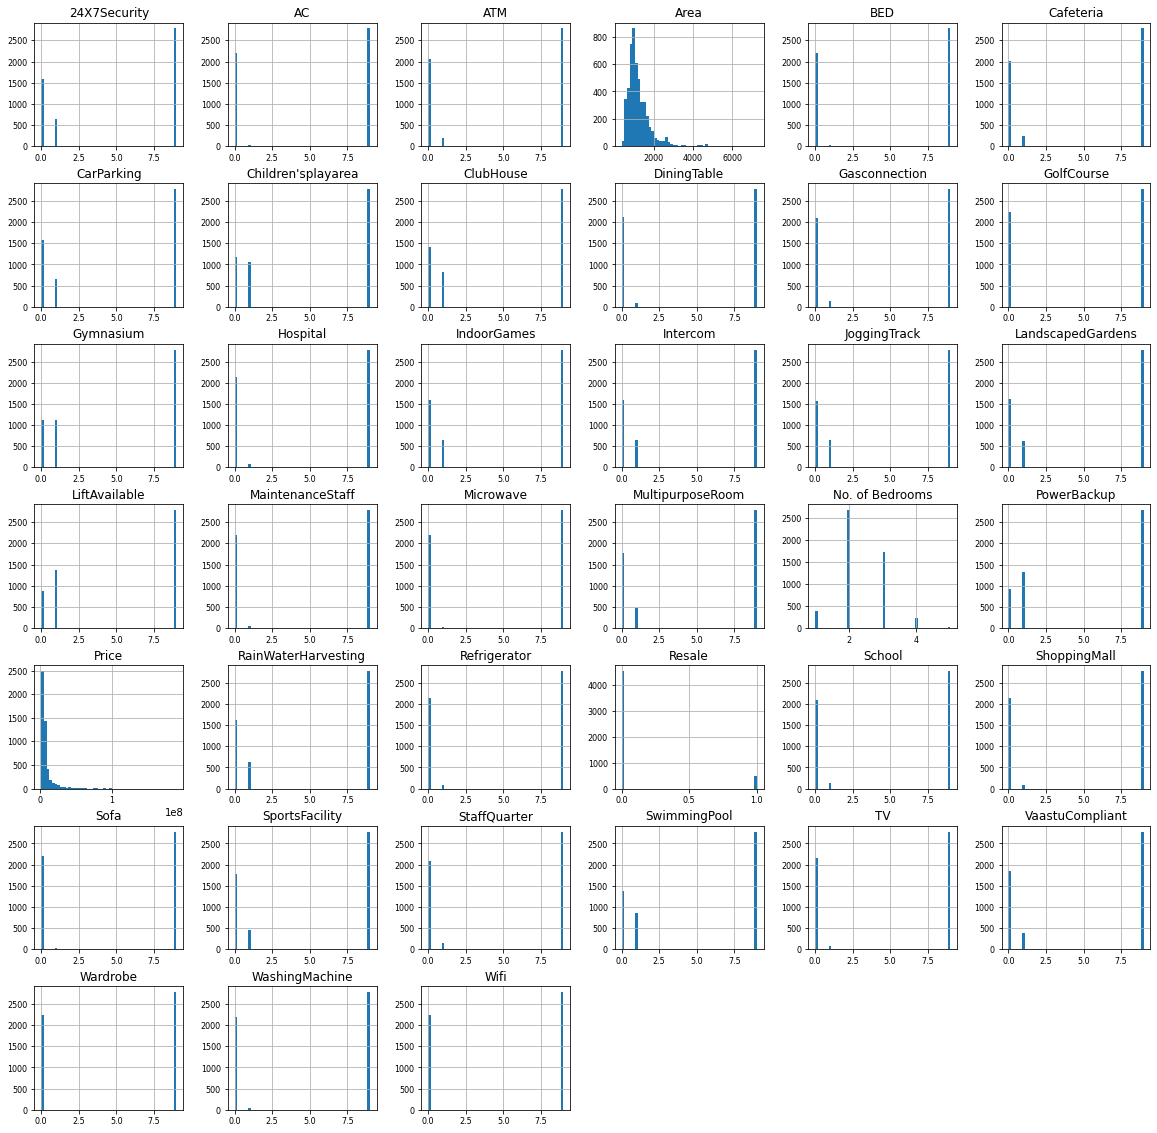

In [9]:
# Now let's perfrom distribution of data on each feature for better analysis
City.PlotFeatures()

In [10]:
# We can see Price and Area are correlated
# Also most of the categorical features are 100% correlated with almost each other

In [11]:
# Now, let's find columns with strong correlation to target
City.CorrTarget()

Correlation of every attribute with Price
Area                   0.443300
No. of Bedrooms        0.313354
Resale                 0.076791
Gymnasium              0.050549
SwimmingPool           0.049768
LandscapedGardens      0.047867
PowerBackup            0.047841
ClubHouse              0.047142
Intercom               0.046761
Children'splayarea     0.046719
24X7Security           0.043746
IndoorGames            0.042308
LiftAvailable          0.042119
RainWaterHarvesting    0.041836
SportsFacility         0.041782
CarParking             0.041258
VaastuCompliant        0.041234
Gasconnection          0.040111
JoggingTrack           0.040089
MultipurposeRoom       0.039828
Sofa                   0.039125
Cafeteria              0.039122
WashingMachine         0.038930
Microwave              0.038655
AC                     0.038634
DiningTable            0.038605
BED                    0.038284
StaffQuarter           0.038284
MaintenanceStaff       0.038247
ShoppingMall           0.03823

In [12]:
# Area and No of bedrooms - has the highest value of correlation with target
# Rest of them has almost zero correlation with Price

Plotting data and linear regression model fit for strongly correlated values with Price


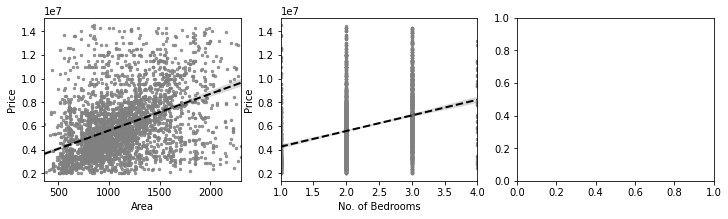

In [13]:
# Analyse strongly related features to target variable
City.StrongCorrRegplot()

Analyzing feature to feature relationships



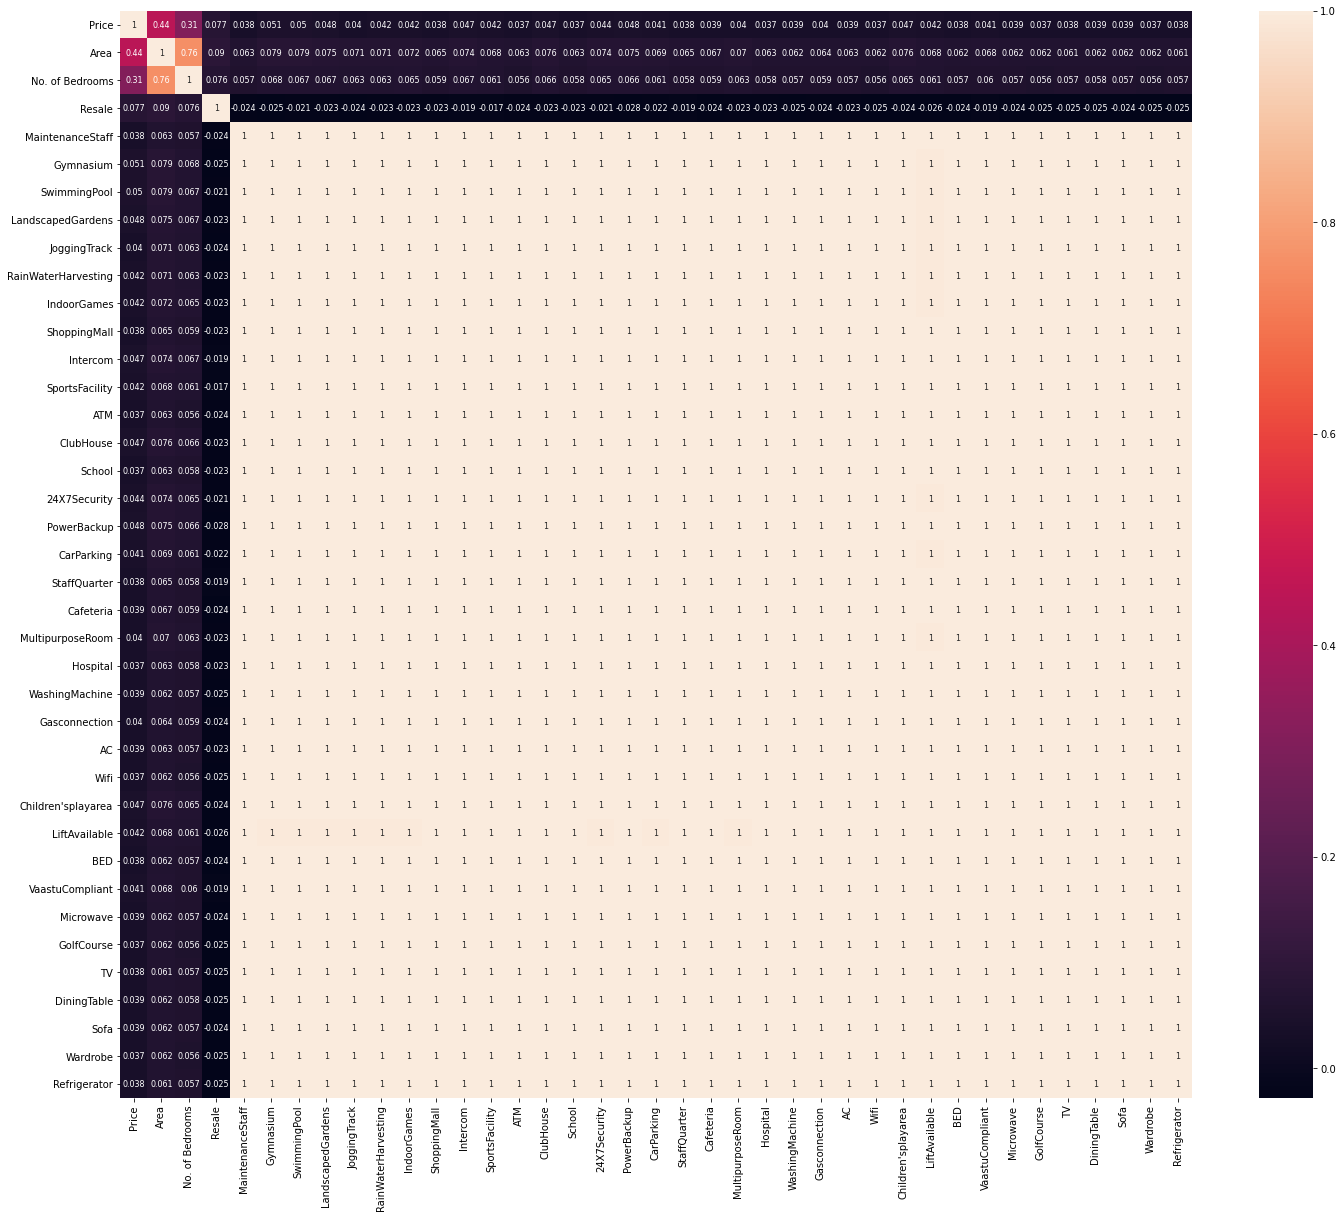

In [14]:
# Analysis of feature to feature relationships using a heatmap
City.CorrFeatures()

Lets look at categorical features distribution

2    2085
3    1198
1     318
4      42
Name: No. of Bedrooms, dtype: int64
----------------------------------------------------------------------------------------------------
0    3321
1     322
Name: Resale, dtype: int64
----------------------------------------------------------------------------------------------------
9    2077
0    1541
1      25
Name: MaintenanceStaff, dtype: int64
----------------------------------------------------------------------------------------------------
9    2077
0     848
1     718
Name: Gymnasium, dtype: int64
----------------------------------------------------------------------------------------------------
9    2077
0    1053
1     513
Name: SwimmingPool, dtype: int64
----------------------------------------------------------------------------------------------------
9    2077
0    1192
1     374
Name: LandscapedGardens, dtype: int64
------------------------------------------------------------------

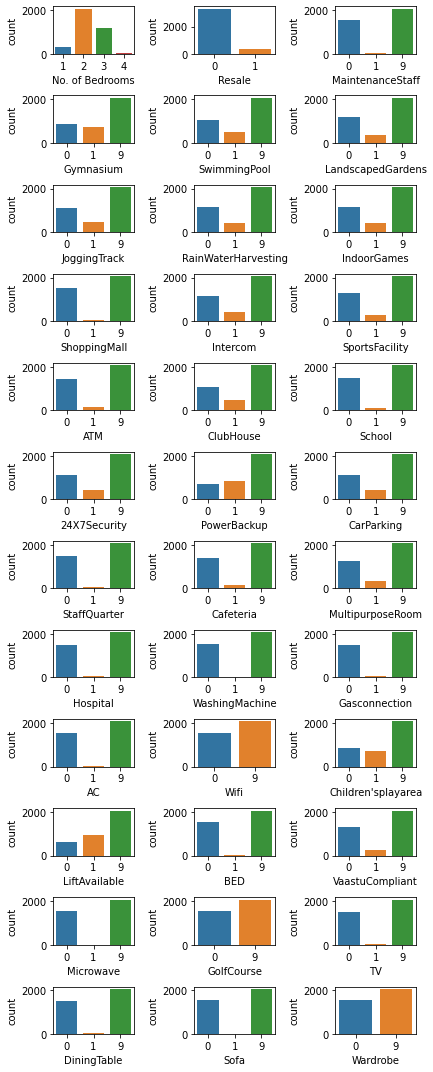

In [15]:
# We can see almost each categorical attributes is 100% correlated within each other
# Thus most of these can be removed when performing regression to predict houseprice
# Let's take a look at each categorical feature
City.CategoricalFeatures()

Relation to Price for all categorical features


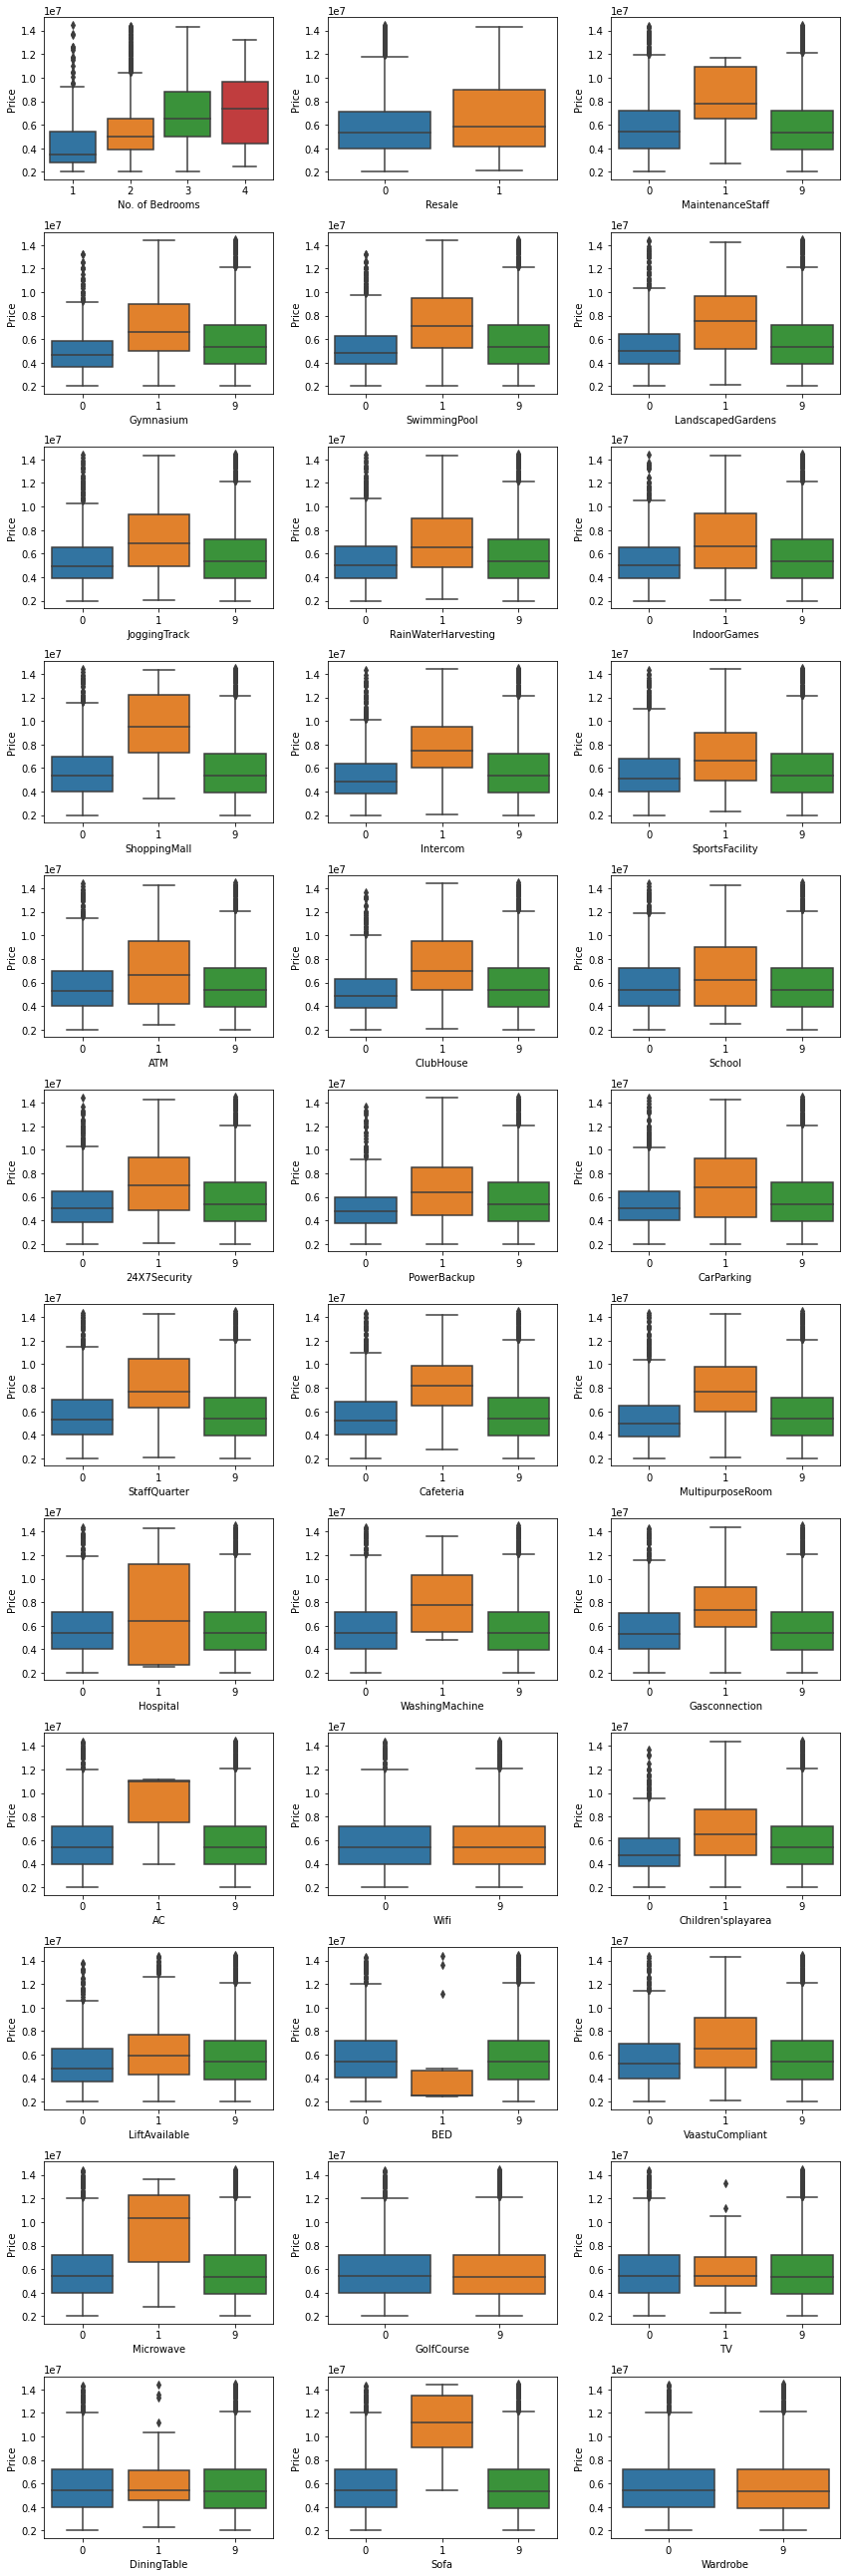

In [16]:
# Also analyze their relationship to target variable
City.CategorialToTarget()

Top 5 locations with highest house prices and lowest house prices



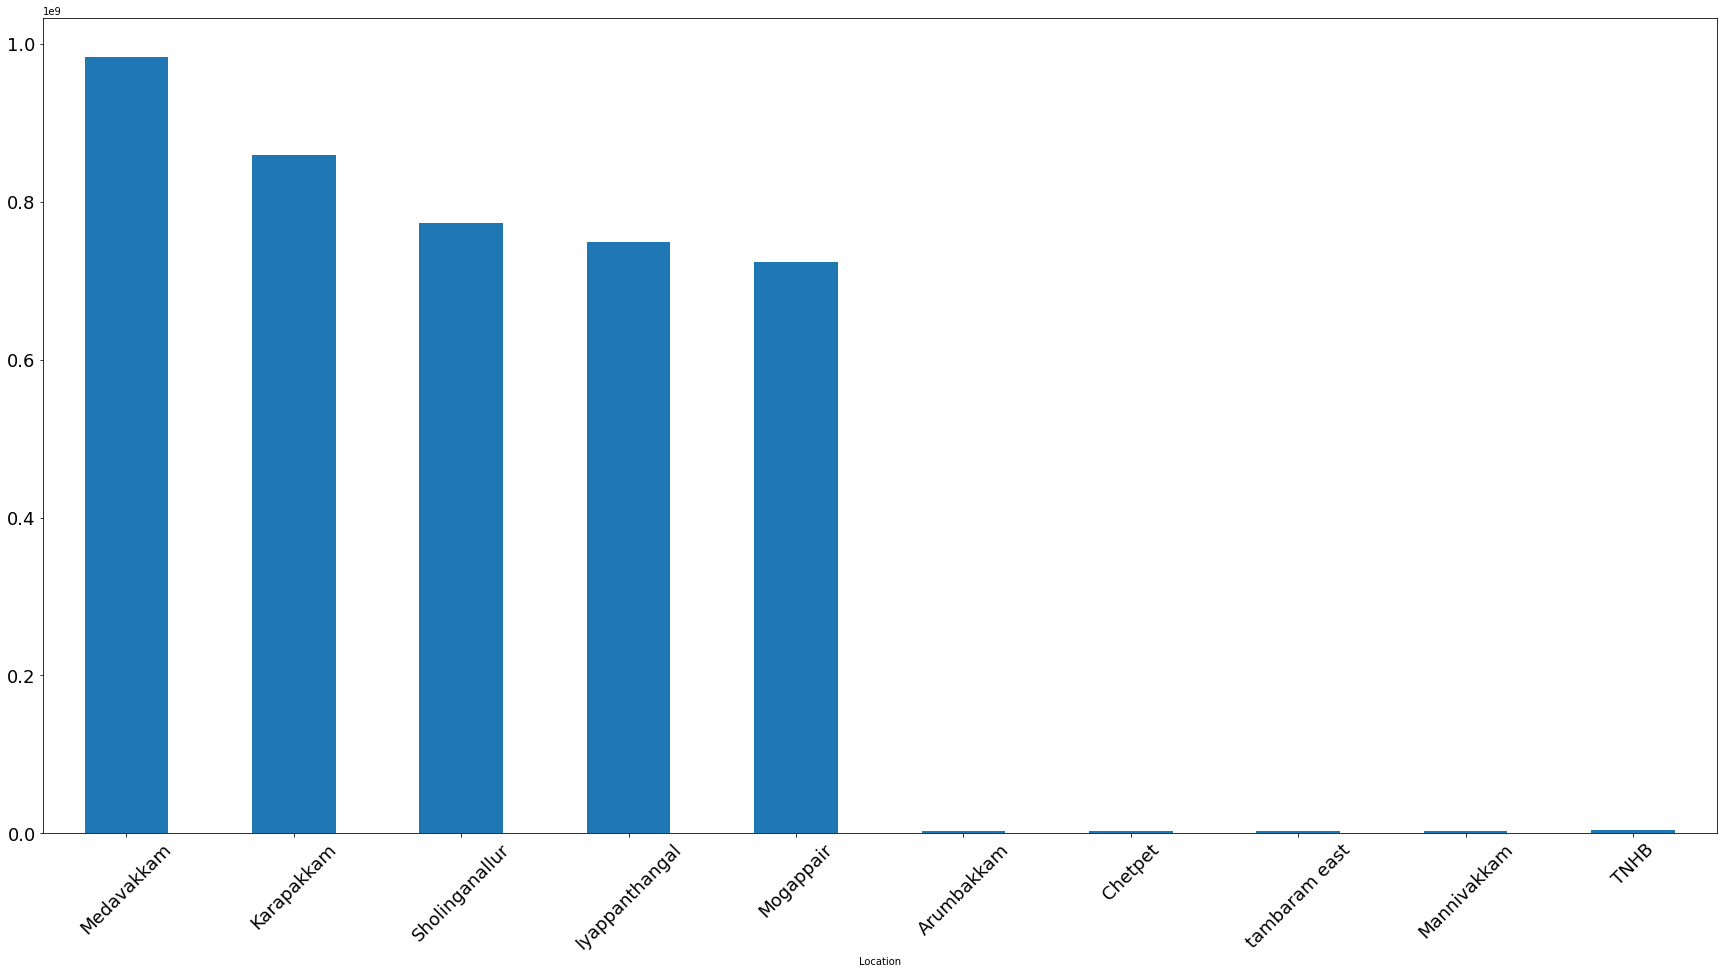

In [17]:
# Let's analyze how house price varies according to locations
City.TargetAnalysisLoc()